
Yesterday's cases = 258532
Latest 7-day moving average cases = 159675
Max 7-Day Average Cases = 251085 , Min 7-Day Average Cases = 0


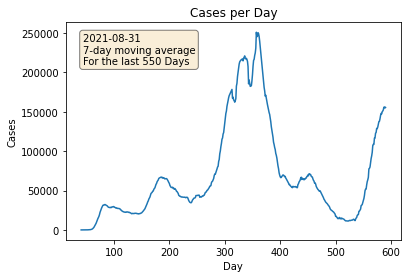

Yesterday's deaths = 1172
Latest 7-day moving average deaths = 1329
Max 7-Day Average Deaths = 3425 , Min 7-Day Average Deaths = 0


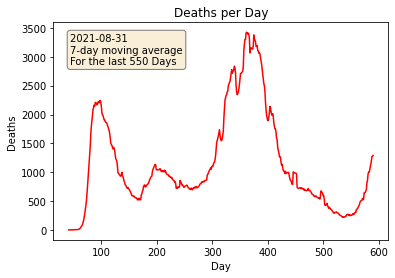

In [1]:
""" Covid global cases and deaths analysis using Pandas dataframe methodology
"""
TIME_RANGE = 550
STEP = 7
COUNTRY = 'US'

import datetime
date = str(datetime.datetime.now())[:11]
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url3 = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20States.csv'

### make dataframes from website data, then pull out Country data as lists
dfdeaths = pd.read_csv(url1)
#print(dfdeaths.head())
dfd1 = dfdeaths.set_index('Country/Region') 
target_deaths = dfd1.loc[COUNTRY].to_list()
#print(dfd1.loc[COUNTRY])

dfcases = pd.read_csv(url2)
#print(dfcases.head())
dfc1 = dfcases.set_index('Country/Region') 
target_cases = dfc1.loc[COUNTRY].to_list()
#print(dfc1.loc[COUNTRY])

### plot cases
print()
print("Yesterday's cases =", target_cases[len(target_cases)-1] - target_cases[len(target_cases)-2])
print('Latest ' +str(STEP) + '-day moving average cases =' , round((sum(target_cases[-STEP:]) - sum(target_cases[-STEP -1:-1]) )/ STEP))
fig, ax = plt.subplots()
textstr = date +'\n' +str(STEP) +'-day moving average\nFor the last ' +str(TIME_RANGE)+ ' Days'   #date+ '\nSemi-log plots \nAll Counties' 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)

days, cases = [], []
for x in range(len(target_cases) - TIME_RANGE, len(target_cases)):
  days.append(x+1)
  cases.append( (sum(target_cases[x-STEP:x]) - sum(target_cases[x-1-STEP:x-1])) / STEP)
print('Max ' +str(STEP)+ '-Day Average Cases =', round(max(cases)), ', Min ' +str(STEP)+ '-Day Average Cases =', round(min(cases)))
plt.title('Cases per Day')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.plot(days, cases)
plt.show()

### plot deaths
print("Yesterday's deaths =", target_deaths[len(target_deaths)-1] - target_deaths[len(target_deaths)-2])
print('Latest ' +str(STEP) + '-day moving average deaths =' , round((sum(target_deaths[-STEP:]) - sum(target_deaths[-STEP -1:-1]) )/ STEP))
fig, ax = plt.subplots()
textstr = date +'\n' +str(STEP) +'-day moving average\nFor the last ' +str(TIME_RANGE)+ ' Days'   #date+ '\nSemi-log plots \nAll Counties' 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
days, deaths = [], []
for x in range(len(target_deaths) - TIME_RANGE, len(target_deaths)):
  days.append(x+1)
  deaths.append( (sum(target_deaths[x-STEP:x]) - sum(target_deaths[x-1-STEP:x-1])) / STEP)
print('Max ' +str(STEP)+ '-Day Average Deaths =', round(max(deaths)), ', Min '+str(STEP)+ '-Day Average Deaths =', round(min(deaths)))
plt.title('Deaths per Day')
plt.xlabel('Day')
plt.ylabel('Deaths')
plt.plot(days, deaths, color='r')
plt.show()


Index(['total_vaccinations', 'date', 'vaccine', 'source_url',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')
New Daily Vaxes =  + 990875
New Daily Vaxes =  + 664840
New Daily Vaxes =  + 858392
New Daily Vaxes =  + 602938
New Daily Vaxes =  + 704840
New Daily Vaxes =  + 1023545
New Daily Vaxes =  + 1010907

Last 7-Day Average Value = 889615


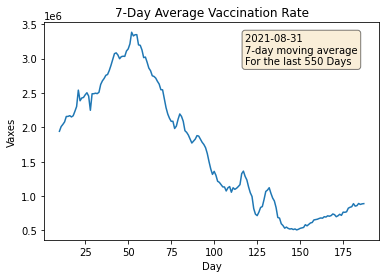

Number totally Vaxed = 173520211
Percent totally Vaxed = 52.10817147147147


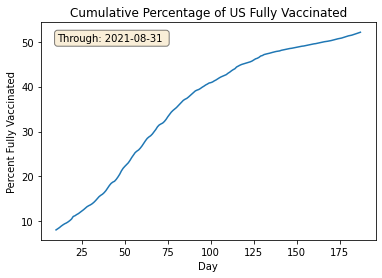


Averge % daily increase of fully vaxed 0.09669943443443442


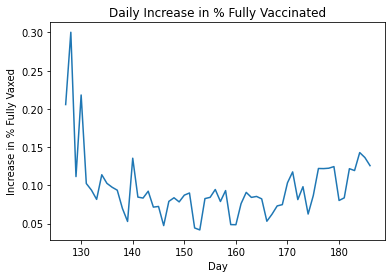

In [2]:
# Vaccincation data
STEP = 7
import datetime
date = str(datetime.datetime.now())[:11]
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

dfvax = pd.read_csv(url3)
dfvax1 = dfvax.drop(['location'], axis =1)
#print(dfvax1.head())
dfvax1.tail()
dfvax2 = dfvax1[50:]   # start at 50 
print(dfvax2.keys())
vax_list1 = list(dfvax2['people_fully_vaccinated']) #
vax_list2 = list(dfvax2['total_vaccinations']) # total_vaccinations,  people_vaccinated

days, vaxes, complete = [], [], []
for x in range(STEP+2, len(vax_list2)):
  days.append(x+1)
  #vaxes.append(vax_list1[x])
  vaxes.append( (sum(vax_list2[x-STEP:x]) - sum(vax_list2[x-1-STEP:x-1])) / STEP)
  complete.append(vax_list1[x]/ 3330000)
for x in range(len(vaxes) -STEP, len(vaxes)):
  #print( 'Number of Vaxes =' ,round(vax_list2[x]) )
  print( 'New Daily Vaxes =  +' ,round(vax_list2[x] - vax_list2[x-1]))
last = vaxes[-1:]
print()
#print('Max Daily Vaxes =', round(max(vaxes)), ', Min Daily Vaxes =', round(min(vaxes)))
print('Last ' + str(STEP) + '-Day Average Value =', round(last[0]) )

fig, ax = plt.subplots()
textstr = date +'\n' +str(STEP) +'-day moving average\nFor the last ' +str(TIME_RANGE)+ ' Days'   #date+ '\nSemi-log plots \nAll Counties' 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.6, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
plt.title(str(STEP) +'-Day Average Vaccination Rate')
plt.xlabel('Day')
plt.ylabel('Vaxes')
plt.plot(days, vaxes)
plt.show()

fig, ax = plt.subplots()
textstr = 'Through: ' +date  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
print('Number totally Vaxed =', round(vax_list1[len(vax_list1)-1]))
print('Percent totally Vaxed =', (vax_list1[len(vax_list1)-1]/3330000))
plt.title('Cumulative Percentage of US Fully Vaccinated')
plt.xlabel('Day')
plt.ylabel('Percent Fully Vaccinated')
plt.plot(days, complete)
plt.show()

print()
recent, fullrate = [], []
recentSTEP = 60
for x in range(len(vax_list1)-recentSTEP, len(vax_list1)):
  recent.append(x)
  fullrate.append((vax_list1[x] - vax_list1[x-1])/3330000)
print('Averge % daily increase of fully vaxed', sum(fullrate)/recentSTEP)
plt.plot(recent, fullrate)
plt.title('Daily Increase in % Fully Vaccinated')
plt.xlabel('Day')
plt.ylabel('Increase in % Fully Vaxed')
plt.show()
